# Figure X

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../") # go to parent dir
from pydune.pydune import Profile

In [6]:
# Plotting Paramaters
params = {'legend.fontsize': 12,
           'axes.labelsize': 14,
           'axes.labelweight': 'bold',
           'axes.titlesize': 14,
           'axes.titleweight': 'bold',
           'xtick.labelsize': 14,
           'ytick.labelsize': 14,
           'mathtext.default':'regular'}
plt.rcParams.update(params)

In [3]:
# Load data
with open('../../data/SR04_test.pkl', 'rb') as f:
    SR04_data = pickle.load(f)
x, z, toe0 = SR04_data['x'], SR04_data['z'], SR04_data['toe']
# Instantiate class
p = Profile(x, z)

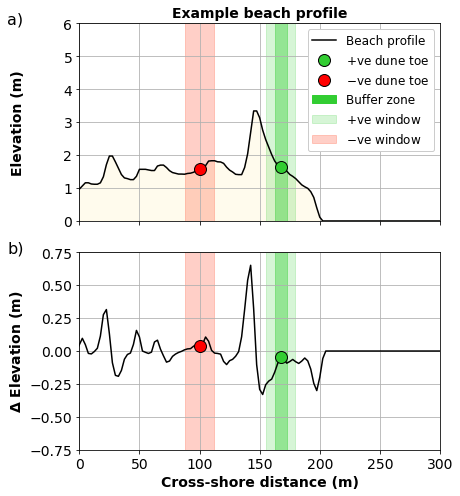

In [31]:
fig,axes = plt.subplots(2,1,figsize=(6.5,7))

n = 0
x = p.x
z = p.z[n]
toe = toe0[n]

window = 12.
buffer = 5.
negtoe = 80

# Plot[0]
axes[0].plot(x,z,'-k',label='Beach profile')
axes[0].fill_between(x,z,color='cornsilk',alpha=0.5)
axes[0].plot(x[toe], z[toe], 'o', mfc='limegreen',mec='k', ms=12, label='$+$ve dune toe')
axes[0].plot(x[negtoe], z[negtoe], 'o', mfc='r',mec='k', ms=12, label='$-$ve dune toe')
axes[0].axvspan(-2, -1, color='limegreen', label='Buffer zone') # legend placeholder
axes[0].axvspan(x[toe]-buffer, x[toe]+buffer, alpha=0.4, color='limegreen')
axes[0].axvspan(x[toe]-window, x[toe]+window, alpha=0.2, color='limegreen', label='$+$ve window')
axes[0].axvspan(x[negtoe]-window, x[negtoe]+window, alpha=0.3, color='tomato', label='$-$ve window')
axes[0].set_ylim(0,6)
axes[0].set_xlim(100,400)
axes[0].set_xticklabels("")
axes[0].set_ylabel('Elevation (m)',labelpad=38)
axes[0].grid()
axes[0].set_title('Example beach profile')
axes[0].legend(loc=1,framealpha=1)

# Plot[1]
zz = np.gradient(z)
axes[1].plot(x, zz, '-k')
axes[1].plot(x[toe], zz[toe], 'o', mfc='limegreen', mec='k', ms=12)
axes[1].plot(x[negtoe], zz[negtoe], 'o', mfc='r',mec='k', ms=12)
axes[1].axvspan(x[toe]-buffer, x[toe]+buffer, alpha=0.4, color='limegreen')
axes[1].axvspan(x[toe]-window, x[toe]+window, alpha=0.2, color='limegreen')
axes[1].axvspan(x[negtoe]-window, x[negtoe]+window, alpha=0.3, color='tomato')
axes[1].set_ylim(-0.75,0.75)
axes[1].set_yticks(np.arange(-0.75, 0.76,0.25))
axes[1].set_xlim(100,400)
axes[1].set_ylabel('$\Delta$ Elevation (m)')
axes[1].set_xlabel('Cross-shore distance (m)')
axes[1].set_xticklabels(np.arange(0, 301, 50))
axes[1].grid()

# labels
axes[0].text(40,6,'a)',fontsize=16)
axes[1].text(40,0.75,'b)',fontsize=16)
plt.tight_layout()

In [32]:
fig.savefig('../figure_2.png', dpi=300)